# Working with missing values in numpy arrays 

## What is np.nan?

Numpy developers have defined a specific value to indicate that values are not a regular number (int, float). Many functions in the numpy package can recognize the np.nan value and ignore those values. The plot functions in package Matplotlib.pyplot are not all designed to work with np.nan values, though.


## What is the purpose of this notebook? 

This notebook shows you an example how we can extract from an array all the values with real numbers and omit the np.nan values. We do this with the help of loops and lists. 

The example works with simulated time series data of a decaying oscillation. 
We manipulate the data array and insert several a np.nan values into the numpy array _y_.
(Imagine a failure in the sensors during the experiment that caused missing values in the time series.)


Our initial attempt of creating a boxplot with the data in array _y_
does not work and causes an error, because of the np.nan values that are in the array.

(see code cell below)

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x= np.arange(1,101,1) # time steps (in seconds, for example)
y= np.exp(-1.*x/50) # amplitude modulation
z= y*np.sin(np.pi*x/10) # a decaying pendulum motion
# insert np.nan values into the array 
z[30:41]=np.nan

# uncomment the line below and you get the error in the boxplot function call
#plt.boxplot(y)

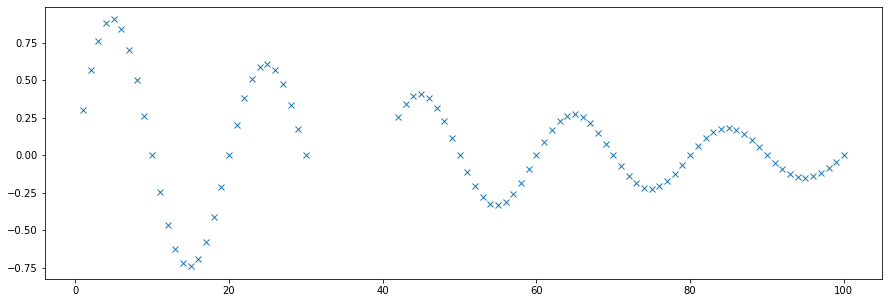

In [50]:
plt.figure(figsize=(15,5))
plt.plot(x,z,'x')
plt.show() # plt.plot works fine with np.nan values in the array

## One solution:  Copy the good values from array z into a new list zclean 

### How to check if a value in the array is np.nan? 

For this purpose, numpy developers provide the function, _np.isnan()_
You can put in a variable and check if the value is np.nan.


In [52]:
test=10.
test2=np.nan
print ( np.isnan(test) )

print ( np.isnan(test2) )


False
True


### Now we use the function _np.isnan()_  in connection with the if-statement (line 5 in the code below).


{'whiskers': [<matplotlib.lines.Line2D at 0x7f28688af080>,
 'caps': [<matplotlib.lines.Line2D at 0x7f28688af780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2868921ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f28688afe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f28688ba198>],
 'means': []}

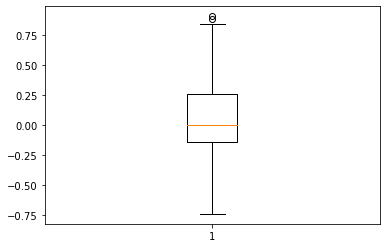

In [35]:
# in order to eliminate the np.nan
# we can do this
zclean=[]
for value in z:
    if np.isnan(value):
        pass
    else:
        zclean.append(value)
#Now the box-plot works
plt.boxplot(zclean)

## In the solultion below we added that we copy the corresponding x-values to a new list xclean.


Often we have paired data like in this time series example. Array *x* contains only valid numerical values (no np.nan values). If you want to keep the x and y values paired, then you have to subsample the array *x* at the right index positions, too. That is done in the example below. We added another list *xclean* and use an index position counter *i* in the loop.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f286840e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f286840edd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f286840e588>],
 'medians': [<matplotlib.lines.Line2D at 0x7f286841b4a8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f286841b7f0>],
 'means': []}

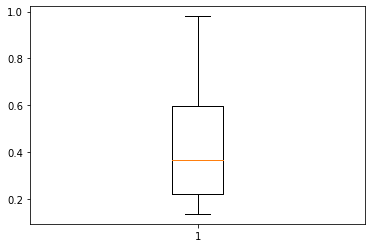

In [53]:
zclean=[]
xclean=[]
i=0
for value in z:
    if np.isnan(value):
        pass
    else:
        zclean.append(value)
        xvalue=x[i]
        xclean.append(xvalue)
        #print("the value is %6.4f" % (value))
    i=i+1



### Now the still boxplot works (of course)

In [ ]:
plt.boxplot(yclean)

### And you can still plot the same time series as before:


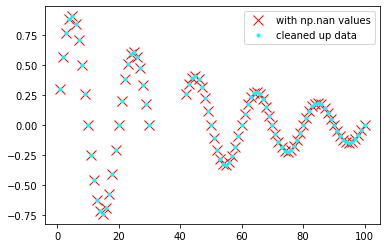

In [54]:

plt.plot(x,z,'x',color='red',markersize=10,label='with np.nan values')
plt.plot(xclean,zclean,'.',color='cyan',label='cleaned up data')

plt.legend()
plt.show()


### Note: 

We use lists because they are convenient to build and append values to them. You can always convert them into type numpy array 
before working with them in the data analysis and plotting with


In [57]:
yclean=np.array(yclean)
xclean=np.array(xclean)
yclean=yclean*100 #

### Summary:

Real-world data are hardly ever perfect. Missing values can be indicated in numpy arrays with np.nan.
Oftentimes we need to clean up the data arrays before we can conduct our data analysis. We have ways to check for np.nan values. Lists and for-loops allow us to collect the good data values in lists or arrays. This notebook provides a fairly simply but widely applicable 'recipe' code for cleaning 1-dimensional arrays from np.nan values.
